In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [3]:
fig = px.histogram(diabetes,
                x='Pregnancies',
                color='Outcome'
                #y='Balance',
                #y='CustomerId',
                #nbins=40,
                #height=500,
                #width=1000,
                #labels=legend,
                #labels=dict(Balance='Баланс пользователей', y='Количество пользователей'),
                #title='Распределение балансов пользователей'
                )
fig.show()

In [9]:
fig = px.box(diabetes,
            x='Pregnancies',
            y="Outcome",
            orientation='h'
            #labels=legend,
            #height=300,
            #width=1000, 
            #title='Распределение возраста от признака оттока'
            )
fig.show()

In [13]:
dupl_columns = list(diabetes.columns)
#dupl_columns.remove('id')

mask = diabetes.duplicated(subset=dupl_columns)
duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

diabetes = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes.shape[0]}')

Число найденных дубликатов: 10
Результирующее число записей: 768


In [15]:
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [16]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Результирующее число признаков: 9


In [17]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [18]:
# Попробуйте найти пропуски в данных с помощью метода isnull().
cols_null_percent = diabetes.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

In [24]:
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI
# на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.
#создаем копию исходной таблицы
fill_data = diabetes.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
def zamena(x):
    if x == 0:
        return np.nan
    return x

for col in {'Glucose','BloodPressure','SkinThickness','Insulin','BMI'}:
    fill_data[col]=fill_data[col].apply(zamena)

# Попробуйте найти пропуски в данных с помощью метода isnull().
cols_null_percent = fill_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)  


Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

In [25]:
print(fill_data.shape)

(768, 9)


In [26]:
#создаем копию исходной таблицы
drop_data = fill_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
#drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
#drop_data.isnull().mean()
#Посмотрим на результирующее число записей:

print(drop_data.shape)

(768, 8)


In [29]:
#создаем копию исходной таблицы
#drop_data = fill_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
#thresh = drop_data.shape[0]*0.7
thresh = drop_data.shape[1]-2
#удаляем столбцы, в которых более 30% (100-70) пропусков
#drop_data = drop_data.dropna(thresh=thresh, axis=1)

#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(thresh=thresh, axis=0)

#отображаем результирующую долю пропусков
drop_data.isnull().mean()
#Посмотрим на результирующее число записей:

print(drop_data.shape)



(761, 8)


In [30]:
#создаем копию исходной таблицы
fill_data = drop_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски

#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(fill_data.median())
#выводим результирующую долю пропусков
fill_data.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [31]:
fill_data['SkinThickness'].mean()

29.109067017082786

## Метод межквартильного размаха

In [39]:
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False,log_plus=1):
    if log_scale:
        x = np.log(data[feature]+log_plus)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [36]:
outliers, cleaned = outliers_iqr(fill_data, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


## Метод z-отклонения

In [40]:
# Метод 3х сигм

def outliers_z_score(data, feature, left=3, right=3, log_scale=False,log_plus=1):
    if log_scale:
        x = np.log(data[feature]+log_plus)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [38]:
outliers, cleaned = outliers_z_score(fill_data, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

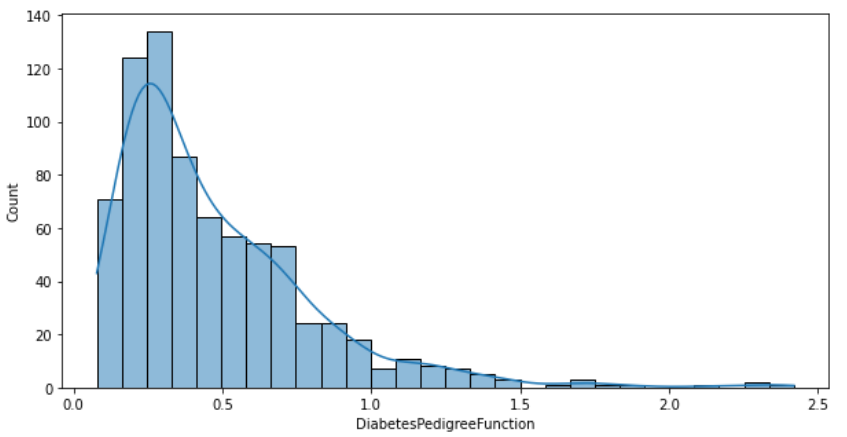

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [41]:
outliers, cleaned = outliers_iqr(fill_data, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [43]:
outliers, cleaned = outliers_iqr(fill_data, 'DiabetesPedigreeFunction',log_scale=True,log_plus=0)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 761
